In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from google.colab import files

file = files.upload()

Saving Data_CSV.csv to Data_CSV.csv


In [ ]:
data = pd.read_csv('./Data_CSV.csv', delimiter = ";")

data

,USSW,PUM,UPKH,UPKM,JK,SBB,UTKM,DA
0,39,1,23,13,5,118,39,1
1,39,2,16,11,3,175,39,0
2,39,2,20,12,3,135,39,0
3,39,1,21,11,3,125,40,0
4,38,2,20,15,2,183,38,0
...,...,...,...,...,...,...,...,...
173,40,1,21,12,4,145,40,0
174,41,2,26,14,3,195,41,0
175,41,1,34,13,2,138,42,1
176,41,2,30,12,2,129,41,0


In [ ]:
x = data.drop(["DA"], axis = 1)
y = data["DA"]

In [ ]:
col_names = list(x.columns)
s_scaler = preprocessing.StandardScaler()
x_df = s_scaler.fit_transform(x)
x_df = pd.DataFrame(x_df, columns = col_names)
x_df

,USSW,PUM,UPKH,UPKM,JK,SBB,UTKM
0,-0.683156,-0.805076,-0.145916,0.028094,1.376290,-0.856930,-0.303708
1,-0.683156,1.242118,-1.877452,-1.083186,0.083522,1.006025,-0.303708
2,-0.683156,1.242118,-0.888003,-0.527546,0.083522,-0.301312,-0.303708
3,-0.683156,-0.805076,-0.640641,-1.083186,0.083522,-0.628146,-0.168558
4,-0.782261,1.242118,-0.888003,1.139374,-0.562863,1.267493,-0.438858
...,...,...,...,...,...,...,...
173,-0.584051,-0.805076,-0.640641,-0.527546,0.729906,0.025522,-0.168558
174,-0.484946,1.242118,0.596171,0.583734,0.083522,1.659694,-0.033408
175,-0.484946,-0.805076,2.575069,0.028094,-0.562863,-0.203262,0.101742
176,-0.484946,1.242118,1.585620,-0.527546,-0.562863,-0.497412,-0.033408


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size = 0.25, random_state = 5)

In [ ]:
early_stopping = callbacks.EarlyStopping(min_delta = 0.001, patience = 40, restore_best_weights = True)

model = Sequential()

model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
model.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.75))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 1000, callbacks = [early_stopping], validation_split = 0.2)

Epoch 1/1000
4/4 [==============================] - 1s 62ms/step - loss: 0.6928 - accuracy: 0.7830 - val_loss: 0.6918 - val_accuracy: 0.8148
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6916 - accuracy: 0.7736 - val_loss: 0.6904 - val_accuracy: 0.8148
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6903 - accuracy: 0.7736 - val_loss: 0.6891 - val_accuracy: 0.8148
Epoch 4/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.6893 - accuracy: 0.7736 - val_loss: 0.6877 - val_accuracy: 0.8148
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6879 - accuracy: 0.7736 - val_loss: 0.6862 - val_accuracy: 0.8148
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6865 - accuracy: 0.7736 - val_loss: 0.6848 - val_accuracy: 0.8148
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6855 - accuracy: 0.7736 - val_loss: 0.6833 - val_accuracy: 0.8148
Epoch 8/1000


In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 81.48%


In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

2/2 [==============================] - 0s 7ms/step


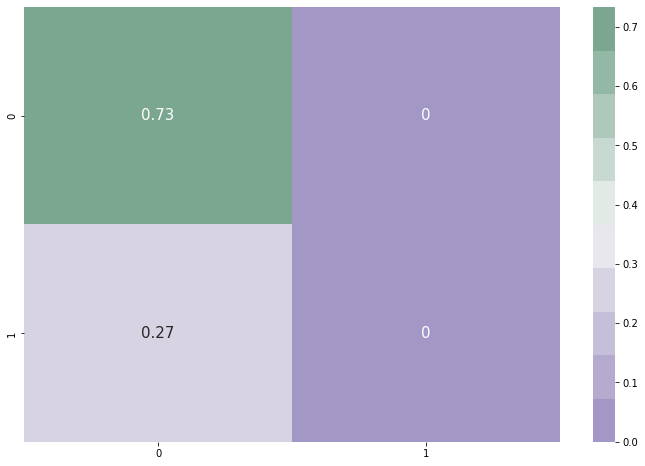

In [ ]:
cmap1 = sns.diverging_palette(275, 150, s = 40, l = 65, n = 10)
plt.subplots(figsize = (12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})